# Task 1 - Prediction using supervised ML

In Supervised learning machine is trained with "labelled" training data, on the basis of the data the output is predicted.

## Predict the percentage of an student based on the number of hours.

## Q) What will be predicted score if a student studies for 9.52hrs/day. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

DATA VISUALIZATION

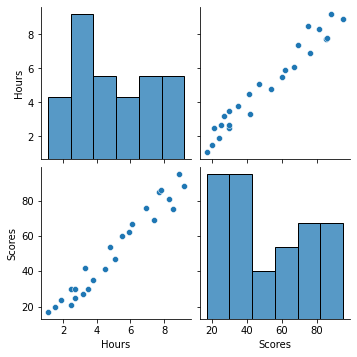

In [9]:
sns.pairplot(s_data)

<AxesSubplot:>

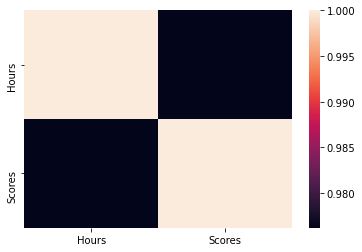

In [10]:
sns.heatmap(s_data.corr())

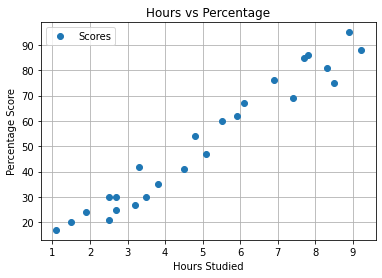

In [11]:
#plotting the distribution scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.grid()
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

DATA PREPROCESSING

In [12]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Training complete')

Training complete


PLOTTING THE LINE OF REGRESSION

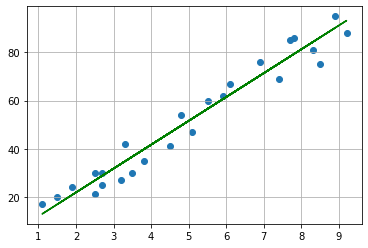

In [19]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)
plt.plot(X,line,color='green');
plt.grid()
plt.show()

MAKING PREDICTIONS

In [20]:
print(X_test) #testing data in hours
y_pred = regressor.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing actual and predicted
df = pd.DataFrame({'Actual' : y_test, 'predicted': y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


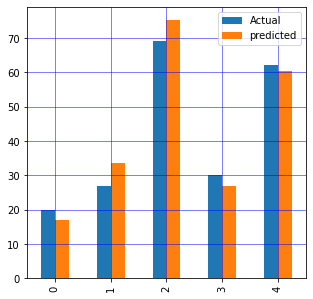

In [27]:
#Plotting Bar-graph to show the difference

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='blue')
plt.grid(which='minor',linewidth='0.5',color='blue')
plt.show()

In [29]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### What will be predicted score if a student studies for 9.25 hrs/day?

In [30]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


In [31]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298


CONCLUSION

The predicted score if a student studies for 9.25 hrs/day is 93.6917.

THANK YOU